In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from datetime import datetime,timedelta
import re
pd.set_option('mode.chained_assignment', None)
import seaborn as sns

In [2]:
df = pd.read_csv('gsearch_jobs.csv')

In [3]:
df.head(20)

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python']"
1,1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,17 hours ago,Contractor,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['mysql', 'matplotlib', 'r', 'matlab', 'mongod..."
2,2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'powerpoint', 'tableau', 'qlik', 'pow..."
4,4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,18 hours ago,Part-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
5,5,5,Research Data Analyst 1,Oregon Health & Science University,Anywhere,via Indeed,Department Overview:\n\nThis position exists w...,"['17 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBEYXRhIEFuYWx5c3...,NaN,17 hours ago,Full-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
6,6,6,Data Analyst,Coinbase,Anywhere,via Startup Jobs,"At Coinbase, our mission is to increase econom...","['15 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'r', 'gdpr', 'aws', 'python', 'sql..."
7,7,7,Data Analyst,CACI International,United States,via Jora,Data AnalystJob Category: Information Technolo...,"['6 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,6 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'tableau', 'vba', 'sql', 'outlook', '..."
8,8,8,Healthcare Data Analyst,Prime Team Partners,Anywhere,via LinkedIn,Healthcare Data Analyst - 100% Remote\n\nSeeki...,"['9 hours ago', 'Work from home', 'Full-time',...",eyJqb2JfdGl0bGUiOiJIZWFsdGhjYXJlIERhdGEgQW5hbH...,https://encrypted-tbn0.gstatic.com/images?q=tb...,9 hours ago,Full-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'powerpoint', 'tableau', 'sql', 'excel']"
9,9,9,Data Analyst,"Aara Technologies, Inc","Fort Smith, AR",via Recruit.net,Qualifications: Bachelor's degree in

In [7]:
df.describe()

,Unnamed: 0,index,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,31494.000000,31494.000000,0.0,5751.000000,5418.000000,5418.000000,3722.000000,2018.000000,5751.000000
mean,15746.500000,1125.266463,NaN,35673.553483,30042.532043,42267.428865,43.161323,101550.272822,93880.571225
std,9091.679025,718.717438,NaN,51628.031446,43519.661764,61171.527260,23.050779,30154.907049,42884.118091
min,0.000000,0.000000,NaN,7.250000,8.000000,10.000000,7.250000,29289.840000,15080.000000
25%,7873.250000,524.000000,NaN,31.000000,18.460000,45.000000,25.000000,83802.250000,63440.000000
50%,15746.500000,1078.000000,NaN,57.500000,42.500000,75.000000,37.500000,96500.000000,93600.000000
75%,23619.750000,1640.000000,NaN,87500.000000,75000.000000,100000.000000,57.500000,112500.000000,119600.000000
max,31493.000000,3455.000000,NaN,288000.000000,230000.000000,346000.000000,300.000000,288000.000000,624000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31494 entries, 0 to 31493
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           31494 non-null  int64  
 1   index                31494 non-null  int64  
 2   title                31494 non-null  object 
 3   company_name         31494 non-null  object 
 4   location             31473 non-null  object 
 5   via                  31485 non-null  object 
 6   description          31494 non-null  object 
 7   extensions           31494 non-null  object 
 8   job_id               31494 non-null  object 
 9   thumbnail            17248 non-null  object 
 10  posted_at            31494 non-null  object 
 11  schedule_type        31317 non-null  object 
 12  work_from_home       13983 non-null  object 
 13  salary               5751 non-null   object 
 14  search_term          31494 non-null  object 
 15  date_time            31494 non-null 

In [128]:
### Convert string into list
df2=df.copy()
df2['description_tokens'] = df2['description_tokens'].apply(lambda x: x.replace('[','').replace(']','').split(','))
def quotes(x):
    for i in range(len(x)):
        x[i] = x[i].replace(" ","").strip("'")
    return x
df2['description_tokens'] = df2['description_tokens'].map(quotes)

In [93]:
### Create new dataframe only with the skills
skills = pd.DataFrame(df2['description_tokens'].explode().value_counts())
skills = skills.sort_values('count',ascending = False).head(10).reset_index()

### Remove empty description
skills = skills[skills['count'] != 6649]

<Axes: ylabel='description_tokens'>

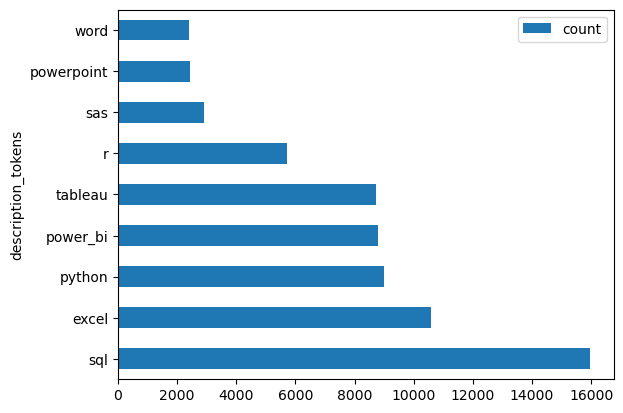

In [94]:
skills.set_index('description_tokens').plot.barh()

In [95]:
skills2 = skills.copy()

In [96]:
skills2['count'] = skills2['count'].apply(lambda x: (x/24845)*100)

<Axes: ylabel='description_tokens'>

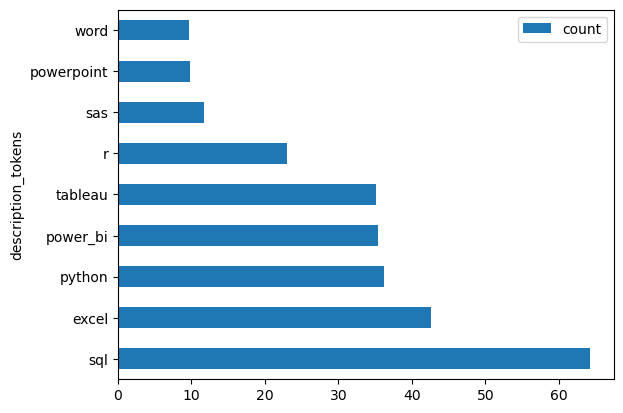

In [97]:
skills2.set_index('description_tokens').plot.barh()

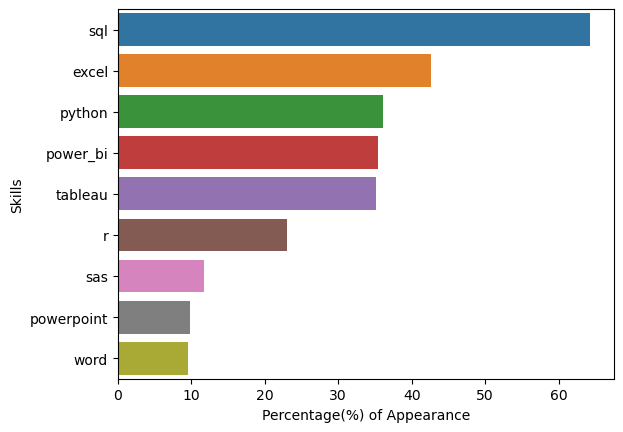

In [113]:
fig = sns.barplot(skills2,x='count',y='description_tokens')
fig.set(xlabel='Percentage(%) of Appearance', ylabel='Skills')
plt.show()
None

In [100]:
skills2

,description_tokens,count
0,sql,64.274502
1,excel,42.644395
2,python,36.144093
3,power_bi,35.435701
4,tableau,35.121755
6,r,23.050916
7,sas,11.664319
8,powerpoint,9.788690
9,word,9.615617


In [129]:
def date(x):
    x = datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")
    return x
df2['date_time'] = df2['date_time'].map(date)

In [138]:
print(df2['date_time'][1].date())

2023-08-03


In [140]:
def justdate(x):
    x = x.date()
    return x

In [141]:
df2['date'] = df2['date_time'].map(justdate)

<Axes: xlabel='date'>

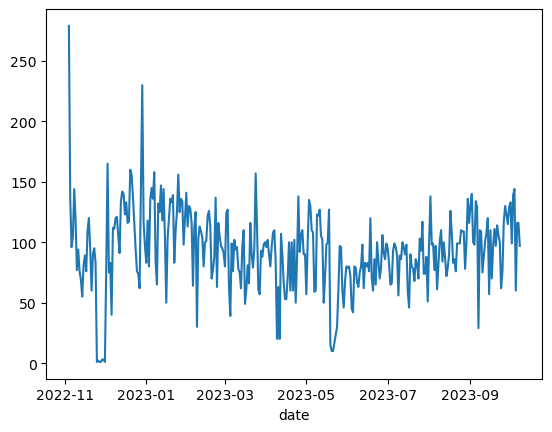

In [144]:
df2.groupby('date').count()['job_id'].plot.line()

<Axes: xlabel='via'>

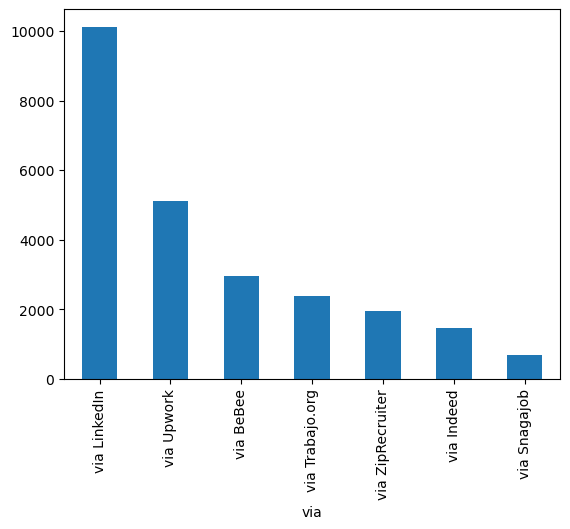

In [174]:
df2.groupby('via').count().sort_values('job_id',ascending = False)['job_id'].head(7).plot.bar()

In [177]:
### Create new dataframe only with the skills
platforms = pd.DataFrame(df2['via'].value_counts())
platforms = platforms.sort_values('count',ascending = False).head(10).reset_index()


platforms['count'] = platforms['count'].apply(lambda x: (x/31485)*100)

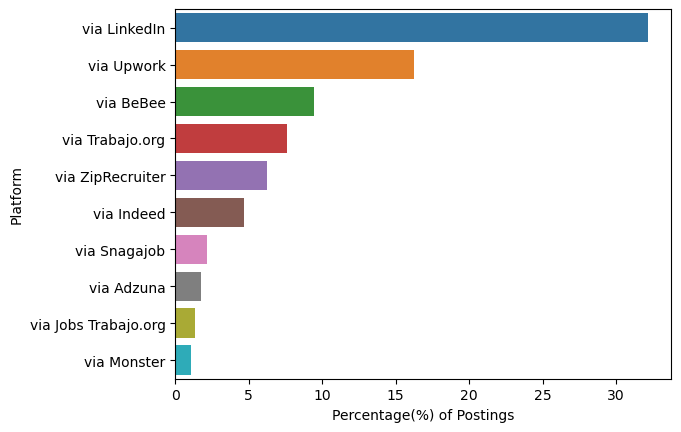

In [179]:
fig2 = sns.barplot(platforms,x='count',y='via')
fig2.set(xlabel='Percentage(%) of Postings', ylabel='Platform')
plt.show()
None

In [178]:
platforms

,via,count
0,via LinkedIn,32.139114
1,via Upwork,16.214070
2,via BeBee,9.404478
3,via Trabajo.org,7.581388
4,via ZipRecruiter,6.228363
5,via Indeed,4.668890
6,via Snagajob,2.166111
7,via Adzuna,1.750040
8,via Jobs Trabajo.org,1.337145
9,via Monster,1.063999


<Axes: xlabel='company_name'>

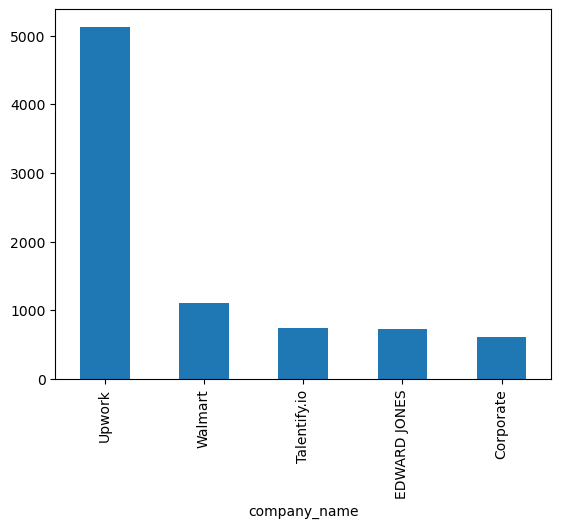

In [159]:
df2.groupby('company_name').count().sort_values('job_id',ascending = False)['job_id'].head(5).plot.bar()

In [161]:
df2.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,year,date
0,0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, python]",2023,2023-08-03
1,1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,17 hours ago,Contractor,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[mysql, matplotlib, r, matlab, mongodb, python...",2023,2023-08-03
2,2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023,2023-08-03
3,3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[word, powerpoint, tableau, qlik, power_bi, r,...",2023,2023-08-03
4,4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,18 hours ago,Part-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023,2023-08-03


In [164]:
if 'r' or 'python' in df2['description_tokens'][1]:
    print(True)

True


In [170]:
z= 0
for i in range(len(df2['description_tokens'])):
    if 'tableau' and 'power_bi' in df2['description_tokens'][i]:
        z+=1


In [171]:
z

8125

In [169]:
len(df2['description_tokens'])

31494

In [ ]:
z= 0
for i in range(len(df2['description_tokens'])):
    if 'r' and 'python' in df2['description_tokens'][i]:
        z+=1